In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

class EncoderDecoder(nn.Module):
    def __init__(self):
        super(EncoderDecoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EncoderDecoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

100%|██████████| 170M/170M [00:03<00:00, 43.9MB/s]


In [ ]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        inputs = inputs.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

Epoch 1, Loss: 0.02522372820502733
Epoch 2, Loss: 0.007470749565126265
Epoch 3, Loss: 0.005362692096120561
Epoch 4, Loss: 0.0042077050198350684
Epoch 5, Loss: 0.0036809745514431915
Epoch 6, Loss: 0.0029791210783416846
Epoch 7, Loss: 0.0027604884783025176
Epoch 8, Loss: 0.002346339176439911
Epoch 9, Loss: 0.002031364858530395
Epoch 10, Loss: 0.001932114105322696


Original Images


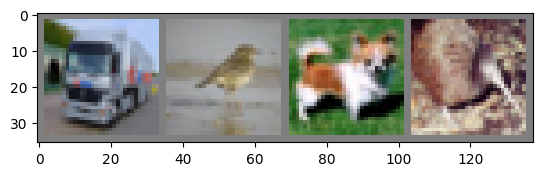

Reconstructed (Blurry) Images


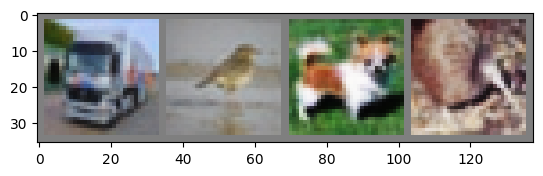

In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

model.eval()
dataiter = iter(trainloader)
images, _ = next(dataiter)

with torch.no_grad():
    reconstructed = model(images.to(device))

print("Original Images")
imshow(torchvision.utils.make_grid(images[:4]))
print("Reconstructed (Blurry) Images")
imshow(torchvision.utils.make_grid(reconstructed[:4]))